In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
DATA_PATH = './data/'
with open(DATA_PATH+'importance_scores.pkl','rb') as f:
    scores_labels = pickle.load(f)

In [14]:
DATA_PATH = './data/'
with open(DATA_PATH+'scores_per_graph.pkl','rb') as f:
    scores_per_graph = pickle.load(f)

In [15]:
len(scores_per_graph)

140

In [107]:
scl = scores_per_graph[56] # look at dataframe for first graph

In [108]:
scl.head()

,cell_type,X,Y,cell_id,graph_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad,coarse_type
0,granulocytes,347.0,356.0,11938,56,0.094223,0.000000,0.0,0.125780,0.033787,0.000000,0.095450,0.0,0.123972,0.039891,0.036839,0.046837,immune
1,granulocytes,447.0,936.0,11939,56,0.000000,0.000000,0.0,0.000000,0.000000,0.019217,0.000000,0.0,0.037497,0.000000,0.000000,0.009074,immune
2,granulocytes,483.0,294.0,11940,56,0.055618,0.001042,0.0,0.024801,0.000000,0.017217,0.000000,0.0,0.004552,0.000000,0.000521,0.013333,immune
3,granulocytes,730.0,609.0,11941,56,0.241363,0.495952,0.0,0.428957,0.189814,0.000000,0.043379,0.0,0.326136,0.167116,0.178465,0.147173,immune
4,granulocytes,947.0,266.0,11942,56,0.000000,0.000000,0.0,0.021050,0.000000,0.002625,0.000000,0.0,0.033203,0.000000,0.000000,0.008576,immune


In [109]:
# cell type counts for 100 most important cells in first graph
scl.sort_values('campp_median',ascending=False).cell_type[:100].value_counts()

vasculature                65
CD8+ T cells               11
tumor cells                 7
CD4+ T cells CD45RO+        7
smooth muscle               2
granulocytes                2
CD68+CD163+ macrophages     2
dirt                        2
stroma                      1
CD68+ macrophages           1
Name: cell_type, dtype: int64

In [102]:
# cell type counts in entire graph
scl.cell_type.value_counts()

smooth muscle                 673
CD68+CD163+ macrophages       347
tumor cells                   215
vasculature                   168
CD8+ T cells                  149
undefined                      93
granulocytes                   71
dirt                           63
stroma                         41
CD4+ T cells CD45RO+           38
lymphatics                     33
plasma cells                   25
Tregs                          22
B cells                        20
CD11b+ monocytes               10
CD4+ T cells                    5
immune cells                    3
CD11b+CD68+ macrophages         2
nerves                          1
tumor cells / immune cells      1
Name: cell_type, dtype: int64

In [103]:
# actual stage and predicted stage
scl.attrs

{'pred_0': 3.0,
 'pred_1': 3.0,
 'pred_2': 3.0,
 'pred_3': 3.0,
 'pred_4': 3.0,
 'pred_5': 3.0,
 'pred_6': 3.0,
 'pred_7': 3.0,
 'pred_8': 3.0,
 'pred_9': 3.0,
 'stage': 3.0}

In [87]:
coarse_map_inv = {
    'stroma': ['stroma'],
    'tumor': ['tumor cells'],
    'immune': ['granulocytes','CD4+ T cells CD45RO+','CD68+CD163+ macrophages',
              'plasma cells', 'CD8+ T cells', 'Tregs', 'CD4+ T cells',
              'CD11c+ DCs', 'B cells', 'CD11b+CD68+ macrophages',
              'immune cells', 'NK cells','CD68+ macrophages GzmB+', 'CD68+ macrophages',
              'CD11b+ monocytes', 'CD4+ T cells GATA3+', 'CD163+ macrophages','CD3+ T cells'],
    'vasculature':['vasculature']
}

In [51]:
coarse_map = {}
for k,v in coarse_map_inv.items():
    for x in v:
        coarse_map[x] = k

In [52]:
coarse_map

{'stroma': 'stroma',
 'tumor cells': 'tumor',
 'granulocytes': 'immune',
 'CD4+ T cells CD45RO+': 'immune',
 'CD68+CD163+ macrophages': 'immune',
 'plasma cells': 'immune',
 'CD8+ T cells': 'immune',
 'Tregs': 'immune',
 'CD4+ T cells': 'immune',
 'CD11c+ DCs': 'immune',
 'B cells': 'immune',
 'CD11b+CD68+ macrophages': 'immune',
 'immune cells': 'immune',
 'NK cells': 'immune',
 'CD68+ macrophages GzmB+': 'immune',
 'CD68+ macrophages': 'immune',
 'CD11b+ monocytes': 'immune',
 'CD4+ T cells GATA3+': 'immune',
 'CD163+ macrophages': 'immune',
 'CD3+ T cells': 'immune',
 'vasculature': 'vasculature'}

In [53]:
scl.head()

,cell_type,X,Y,cell_id,graph_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad
0,granulocytes,347.0,356.0,11938,56,0.094223,0.000000,0.0,0.125780,0.033787,0.000000,0.095450,0.0,0.123972,0.039891,0.036839,0.046837
1,granulocytes,447.0,936.0,11939,56,0.000000,0.000000,0.0,0.000000,0.000000,0.019217,0.000000,0.0,0.037497,0.000000,0.000000,0.009074
2,granulocytes,483.0,294.0,11940,56,0.055618,0.001042,0.0,0.024801,0.000000,0.017217,0.000000,0.0,0.004552,0.000000,0.000521,0.013333
3,granulocytes,730.0,609.0,11941,56,0.241363,0.495952,0.0,0.428957,0.189814,0.000000,0.043379,0.0,0.326136,0.167116,0.178465,0.147173
4,granulocytes,947.0,266.0,11942,56,0.000000,0.000000,0.0,0.021050,0.000000,0.002625,0.000000,0.0,0.033203,0.000000,0.000000,0.008576


In [110]:
scl['coarse_type'] = scl['cell_type'].map(coarse_map).fillna('other')

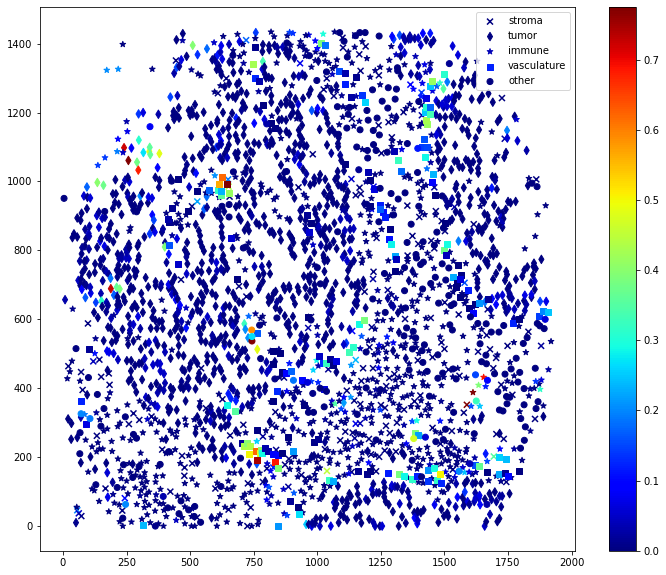

In [111]:
fig, ax = plt.subplots(figsize=(12,10))

mkr_dict = {'stroma': 'x', 'tumor': 'd', 'immune': '*','vasculature':'s', 'other':'o'}
for k,v in mkr_dict.items():
    d = scl[scl.coarse_type==k]
    ax.scatter(d.X, d.Y, 
                c = d.campp_median, 
                marker = v,label=k,
              cmap = 'jet')
ax.legend()
norm = plt.Normalize(np.min(scl.campp_median), np.max(scl.campp_median))
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
ax.figure.colorbar(sm)
plt.show()

In [106]:
scl.sort_values('campp_median',ascending=False).head()

,cell_type,X,Y,cell_id,graph_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad,coarse_type
841,CD68+CD163+ macrophages,1534.0,1187.0,153308,120,0.999999,0.809399,1.000000,0.997097,0.740029,0.924307,0.998466,0.999992,0.863741,0.988501,0.992799,0.078227,immune
80,vasculature,229.0,407.0,32546,120,0.924508,0.797328,0.574690,0.672845,0.999974,0.843439,0.913372,0.726947,0.999999,0.847976,0.845708,0.109724,vasculature
90,vasculature,286.0,693.0,32556,120,0.855718,0.612981,0.470682,0.740435,0.894548,0.817897,0.852331,0.786986,0.782593,0.913009,0.802441,0.098811,vasculature
113,vasculature,674.0,15.0,32579,120,0.813294,0.615302,0.554194,0.587062,0.825089,0.804610,0.690458,0.880131,0.791522,0.791653,0.791588,0.098862,vasculature
28,granulocytes,720.0,886.0,20817,120,0.787198,0.800840,0.707224,0.802197,0.819201,0.762767,0.863974,0.793772,0.778482,0.556053,0.790485,0.055094,immune


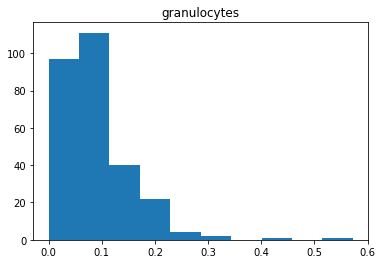

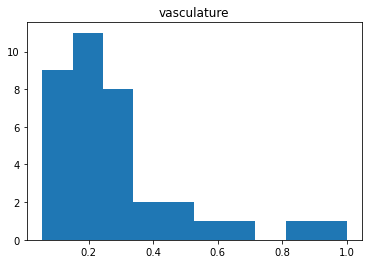

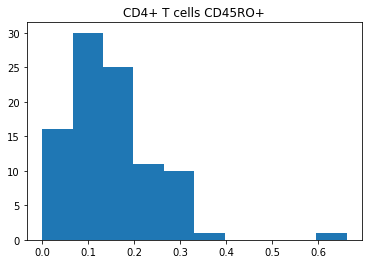

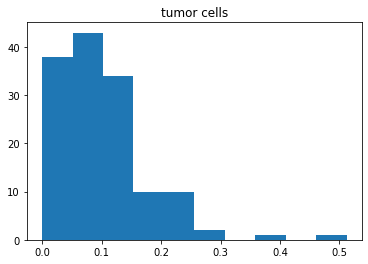

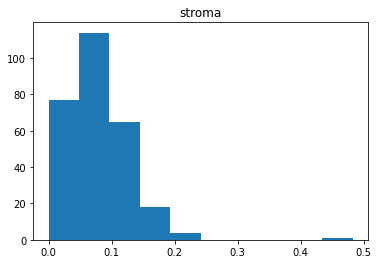

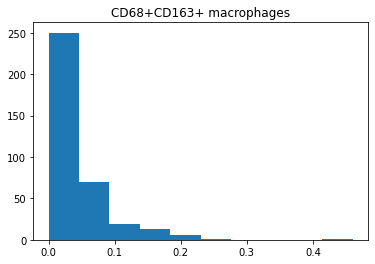

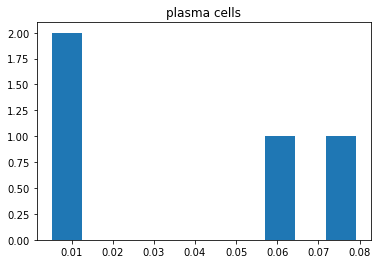

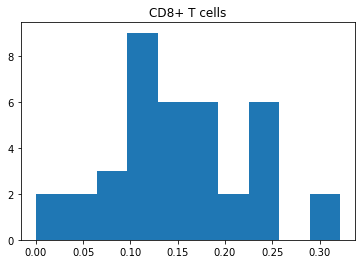

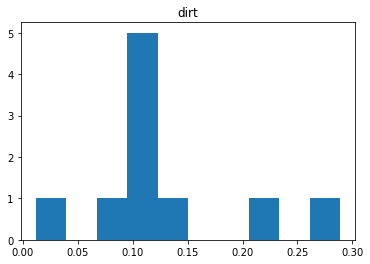

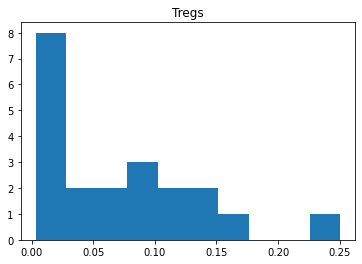

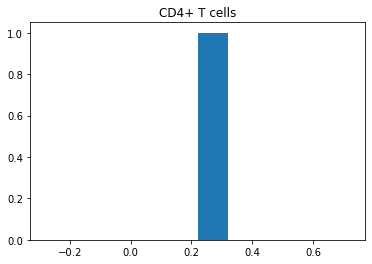

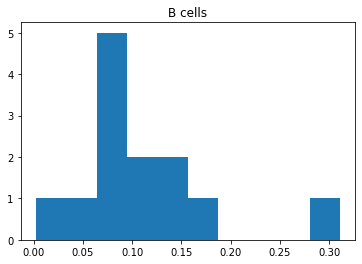

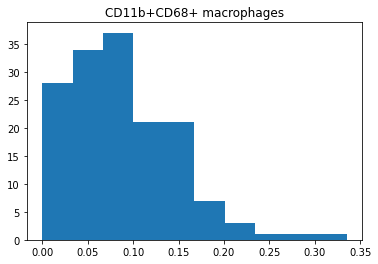

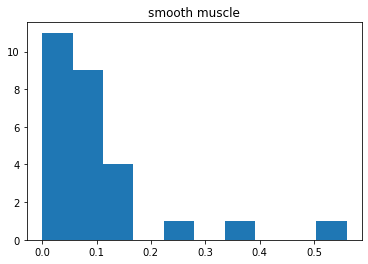

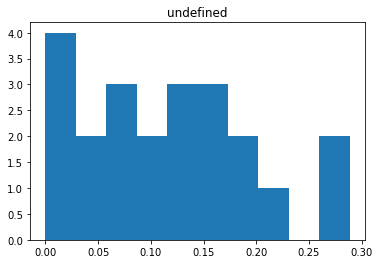

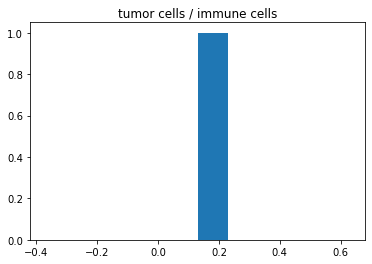

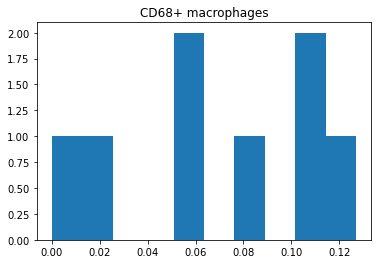

In [44]:
# plot histogram of scores per cell type
for ct in scl.cell_type.unique():
    plt.hist(scl[scl['cell_type'] == ct].campp_median)
    plt.title(ct)
    plt.show()